<div align="center">
  <h1><b>Penyisihan Datavidia 9</b></h1>
  <p><b>Supercalifragilisticexpialidocious</b></p>
  <span style="font-size: 12px;">Author: <a href="https://github.com/ChristellaCindy">Christella Cindy</a>, <a href="https://github.com/Frederickkrisna">Frederick Krisna</a>, and <a href="https://github.com/williamtheodoruswijaya">William Theodorus</a></span>
</div>
<hr>

### 1. Import Libraries

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

- `Evaluation`

In [3]:
def mape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Calculate the Mean Absolute Percentage Error (MAPE).

    Parameters:
    y_true (array-like): True values.
    y_pred (array-like): Predicted values.

    Returns:
    float: The calculated MAPE.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true))

### 2. Load Dataset
---
untuk training, kita akan coba pakai salah terlebih dahulu yaitu "Bawang Merah"

In [77]:
path = "/Users/Hendra Wijaya/OneDrive/Documents/Binus/Datavidia/penyisihan-datavidia/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan"
files = [
    "Bawang Merah", "Bawang Putih Bonggol", "Beras Medium", "Beras Premium",
    "Cabai Merah Keriting", "Cabai Rawit Merah", "Daging Ayam Ras",
    "Daging Sapi Murni", "Gula Konsumsi", "Minyak Goreng Curah",
    "Minyak Goreng Kemasan Sederhana", "Telur Ayam Ras", "Tepung Terigu (Curah)"
]

# Load data
df_list = {}
for file in files:
    df = pd.read_csv(f"{path}/train/{file}.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df_list[file] = df

# For Training purpose, we use only Bawang Merah since all training have the same approach
df = df_list["Bawang Merah"]
df.head()

,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,28970.0,20870.0,26890.0,26650.0,25240.0,35510.0,31740.0,23390.0,25800.0,24870.0,...,48610.0,29240.0,25160.0,24910.0,28030.0,30380.0,35750.0,23360.0,26670.0,28710.0
2022-01-02,29900.0,20710.0,25600.0,26950.0,25240.0,31850.0,30020.0,23550.0,26010.0,24630.0,...,50160.0,28750.0,24770.0,24360.0,27200.0,30260.0,35630.0,23790.0,25690.0,28460.0
2022-01-03,28970.0,20510.0,26390.0,27290.0,24620.0,34880.0,31250.0,23730.0,25910.0,24810.0,...,49510.0,27870.0,24140.0,24740.0,26750.0,30080.0,34980.0,22620.0,26270.0,28050.0
2022-01-04,29600.0,20180.0,26630.0,27450.0,24370.0,35260.0,31640.0,23300.0,25950.0,24910.0,...,49670.0,28330.0,24450.0,24710.0,28800.0,29950.0,34920.0,23010.0,26800.0,27800.0
2022-01-05,29540.0,19960.0,26610.0,27710.0,24210.0,35260.0,34010.0,23640.0,25700.0,24580.0,...,46590.0,28240.0,24640.0,24780.0,28990.0,30240.0,34000.0,23330.0,25360.0,27670.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-01-01 to 2024-09-30
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Aceh                       967 non-null    float64
 1   Bali                       968 non-null    float64
 2   Banten                     967 non-null    float64
 3   Bengkulu                   967 non-null    float64
 4   DI Yogyakarta              968 non-null    float64
 5   DKI Jakarta                967 non-null    float64
 6   Gorontalo                  969 non-null    float64
 7   Jambi                      966 non-null    float64
 8   Jawa Barat                 967 non-null    float64
 9   Jawa Tengah                970 non-null    float64
 10  Jawa Timur                 969 non-null    float64
 11  Kalimantan Barat           968 non-null    float64
 12  Kalimantan Selatan         967 non-null    float64
 13  Kalimantan Tengah          968

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aceh,967.0,34740.020683,7681.229521,21860.0,30555.0,33790.0,36660.0,61030.0
Bali,968.0,28202.200413,6421.992994,14810.0,24215.0,28150.0,30935.0,53400.0
Banten,967.0,34011.065150,7649.079784,21460.0,29625.0,32770.0,37285.0,68970.0
Bengkulu,967.0,34812.130300,7773.763022,19520.0,30915.0,34370.0,37750.0,61590.0
DI Yogyakarta,968.0,30753.657025,7927.974207,16200.0,25755.0,30185.0,35450.0,61470.0
DKI Jakarta,967.0,41475.170631,8408.909831,26580.0,36915.0,40500.0,44300.0,74630.0
Gorontalo,969.0,38127.925697,8728.726011,21250.0,33330.0,37640.0,42930.0,78300.0
Jambi,966.0,28944.668737,6416.316381,17180.0,25475.0,28355.0,31412.5,48820.0
Jawa Barat,967.0,33151.437435,7004.698549,22000.0,28985.0,31860.0,37020.0,65350.0
Jawa Tengah,970.0,32025.659794,7615.586946,19340.0,26960.0,30855.0,36037.5,64100.0


### 3. EDA + Data Preprocessing

> **3.1 Exploratory Data Analysis**

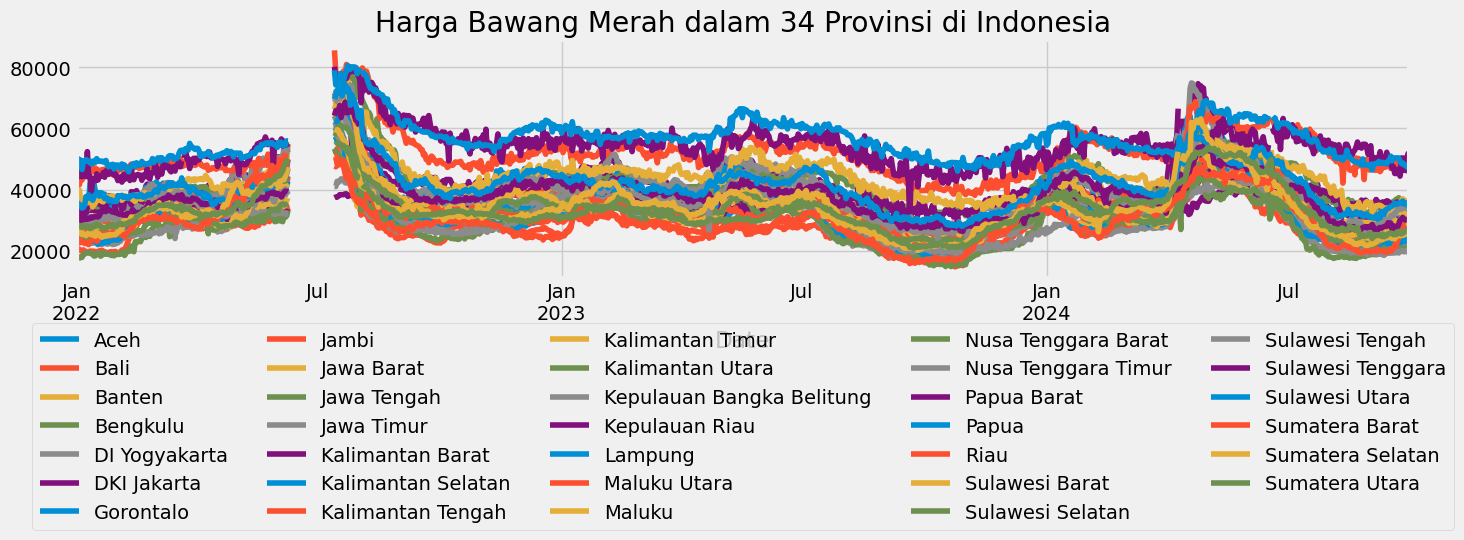

In [80]:
df.plot(figsize=(15, 6))
plt.title('Harga Bawang Merah dalam 34 Provinsi di Indonesia')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan visualisasi yang kita lihat, harga bawang merah memiliki missing data pada Juli 2023. Sehingga kita akan coba melakukan sedikit pendekatan dengan melakukan interpolasi data untuk mengisi kekosongan data ini.

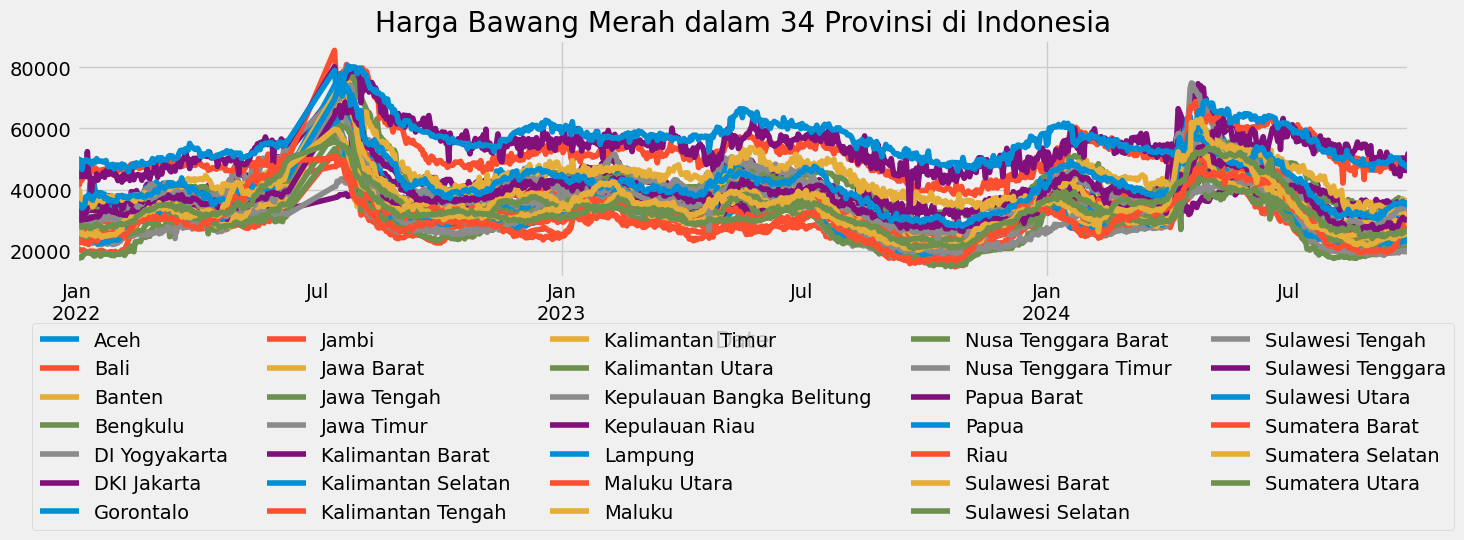

In [81]:
df.interpolate(method='linear', inplace=True)
df.plot(figsize=(15, 6))
plt.title('Harga Bawang Merah dalam 34 Provinsi di Indonesia')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()

Sekarang, coba kita rapikan visualisasinya dengan memperkecil range tanggal kita. Misal, dalam tahun waktu seminggu, kira-kira bagaimana fluktuasi harga bahan pangannya.

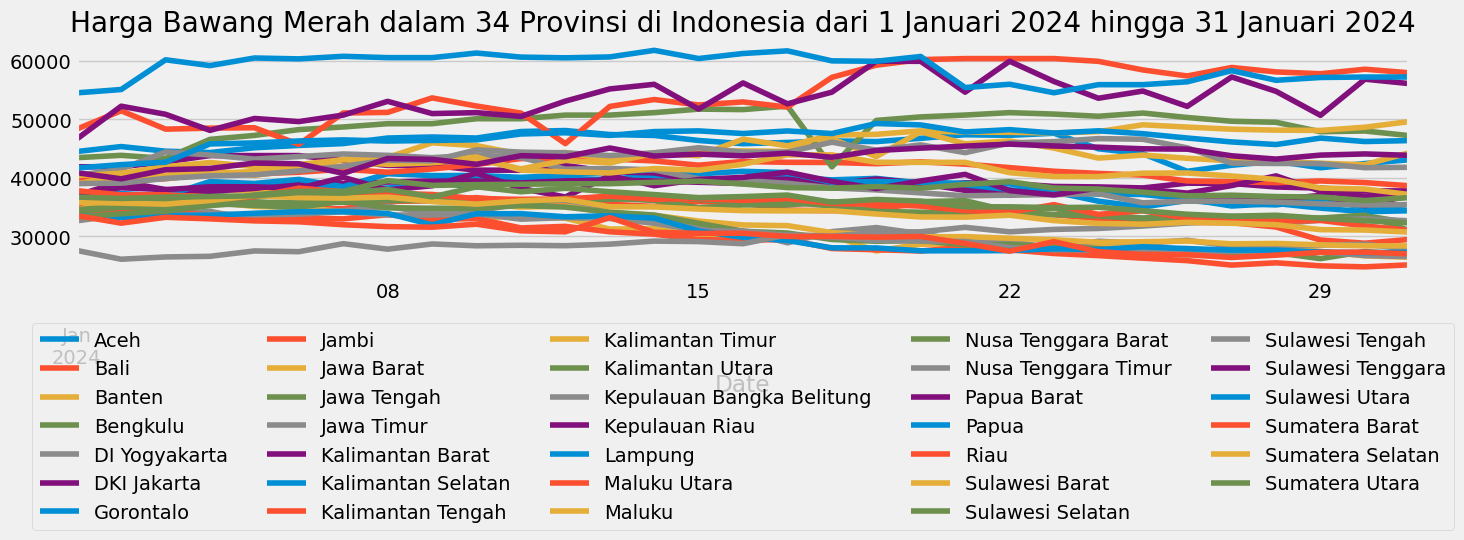

In [82]:
df_2024 = df[(df.index >= '2024-01-01') & (df.index <= '2024-01-31')]
df_2024.plot(figsize=(15, 6), lw = 4)
plt.title('Harga Bawang Merah dalam 34 Provinsi di Indonesia dari 1 Januari 2024 hingga 31 Januari 2024')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()

> 3.2 **Feature Creation**: menambahkan kolom tambahan

Notes: fungsi ini akan dijalankan setelah proses `train_test_split`

In [83]:
def create_features(df):
    """
    Create time series features from datetime index
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

> 3.3 **Handle Missing Values**:

In [84]:
def handle_missing_values(df):
    """
    Handle missing values in place
    """
    df = df.copy()
    df = df.ffill()
    df = df.bfill()
    return df

<Figure size 1500x600 with 0 Axes>

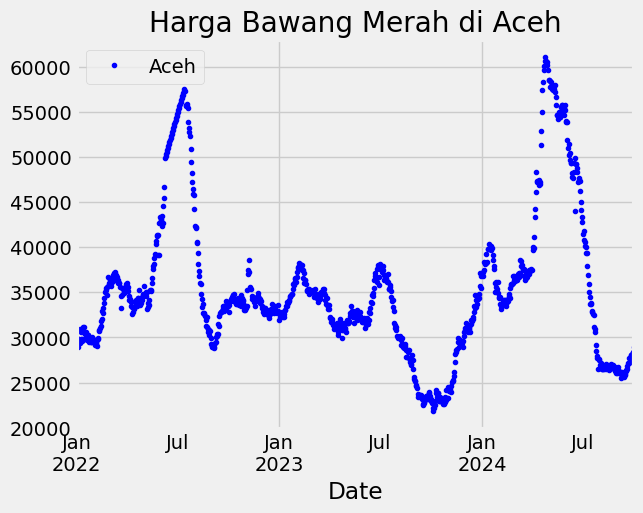

In [85]:
# Take 'Aceh' data only for training only
df_aceh = df[['Aceh']]

plt.figure(figsize=(15, 6))
df_aceh.plot(style='.', 
             color='blue', 
             title='Harga Bawang Merah di Aceh')
plt.show()

> 3.4 **Lag Features**

In [86]:
def add_lags(df, target_col, lags):
    """
    Add lag features to the dataset
    """
    df = df.copy()
    target_map = df[target_col]
    for lag in lags:
        df[f'{target_col}_lag_{lag}'] = target_map.shift(lag)
    return df

> 3.5 **Rolling Mean**

In [87]:
def add_rolling_mean(df, target_col, windows):
    """
    Add rolling mean features to the dataset (Rolling Mean = Moving Average)
    """
    df = df.copy()
    target_map = df[target_col]
    for window in windows:
        df[f'{target_col}_rolling_mean_{window}'] = target_map.rolling(window=window).mean()
    return df

### 4. Train/Test Split

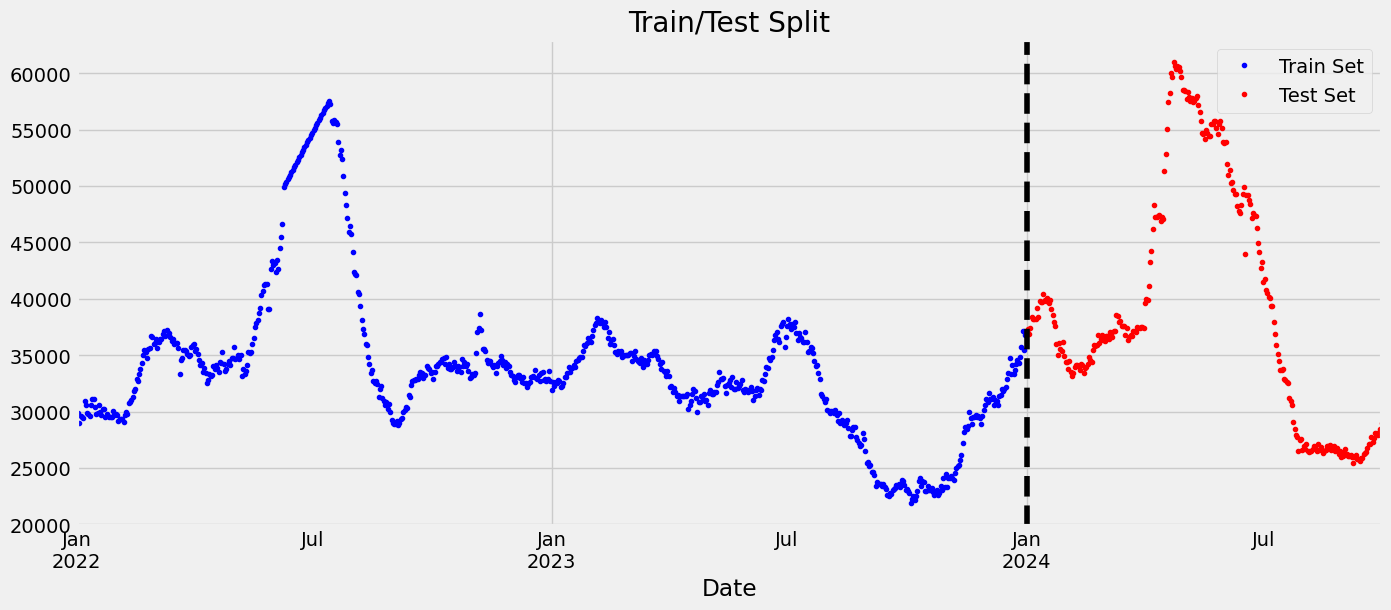

In [88]:
train_aceh = df_aceh.loc[df.index < '2024-01-01']
test_aceh = df_aceh.loc[df.index >= '2024-01-01']

fig, ax = plt.subplots(figsize=(15, 6))
train_aceh.plot(ax=ax, color='blue', style='.', lw=2)
test_aceh.plot(ax=ax, color='red', style='.', lw=2)
plt.title('Train/Test Split')
ax.axvline('01-01-2024', color='black', linestyle='--')
ax.legend(['Train Set', 'Test Set'])
plt.show()

### 5. **Features Engineering**: Memahami target relationship

In [89]:
# Sebelum itu, kita akan menambahkan fitur-fitur waktu ke dalam data
df_aceh = create_features(df_aceh)
df_aceh = handle_missing_values(df_aceh)
df_aceh = add_lags(df_aceh, 'Aceh', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df_aceh = add_rolling_mean(df_aceh, 'Aceh', [3, 5, 7, 14, 30])
df_aceh.head()

,Aceh,hour,dayofweek,quarter,month,year,dayofyear,Aceh_lag_1,Aceh_lag_2,Aceh_lag_3,...,Aceh_lag_6,Aceh_lag_7,Aceh_lag_8,Aceh_lag_9,Aceh_lag_10,Aceh_rolling_mean_3,Aceh_rolling_mean_5,Aceh_rolling_mean_7,Aceh_rolling_mean_14,Aceh_rolling_mean_30
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,28970.0,0,5,1,1,2022,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,29900.0,0,6,1,1,2022,2,28970.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,28970.0,0,0,1,1,2022,3,29900.0,28970.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29280.0,NaN,NaN,NaN,NaN
2022-01-04,29600.0,0,1,1,1,2022,4,28970.0,29900.0,28970.0,...,NaN,NaN,NaN,NaN,NaN,29490.0,NaN,NaN,NaN,NaN
2022-01-05,29540.0,0,2,1,1,2022,5,29600.0,28970.0,29900.0,...,NaN,NaN,NaN,NaN,NaN,29370.0,29396.0,NaN,NaN,NaN


- **Visualize features**

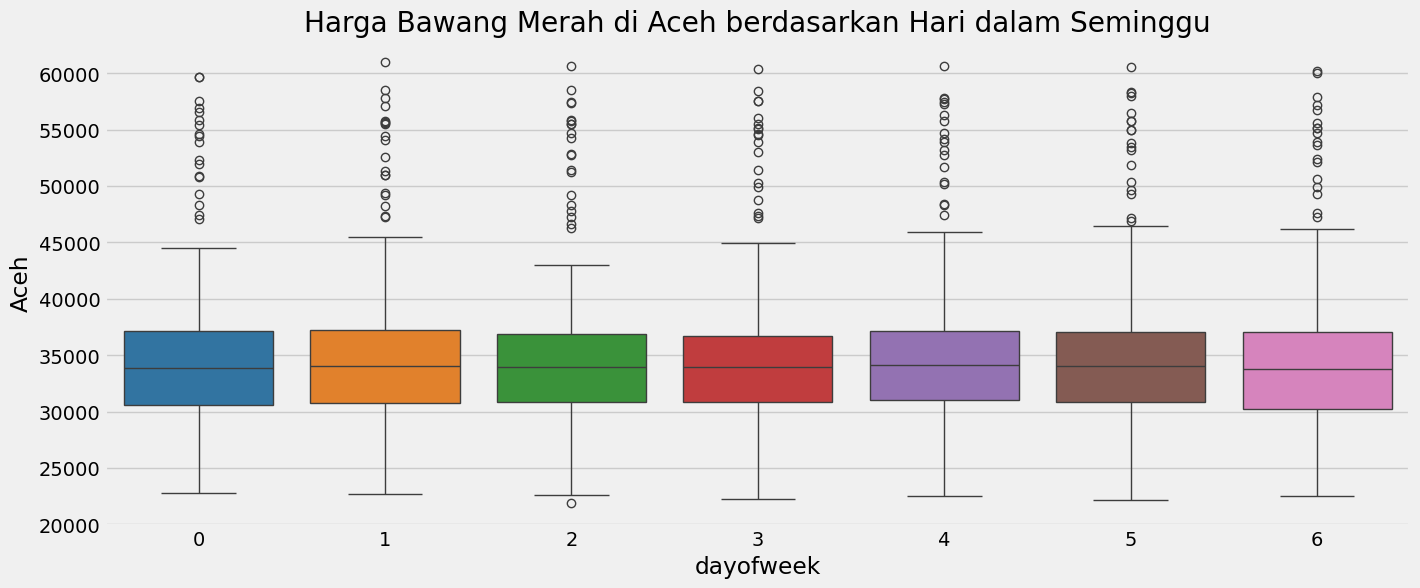

In [90]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_aceh, x='dayofweek', y='Aceh', palette=color_pal)
plt.title('Harga Bawang Merah di Aceh berdasarkan Hari dalam Seminggu')
plt.show()

**Insight**: Dari sini kita bisa menyimpulkan bahwa peningkatan harga dalam 1 minggu cenderung sangat sedikit atau mungkin bisa dibilang tidak ada sama sekali.

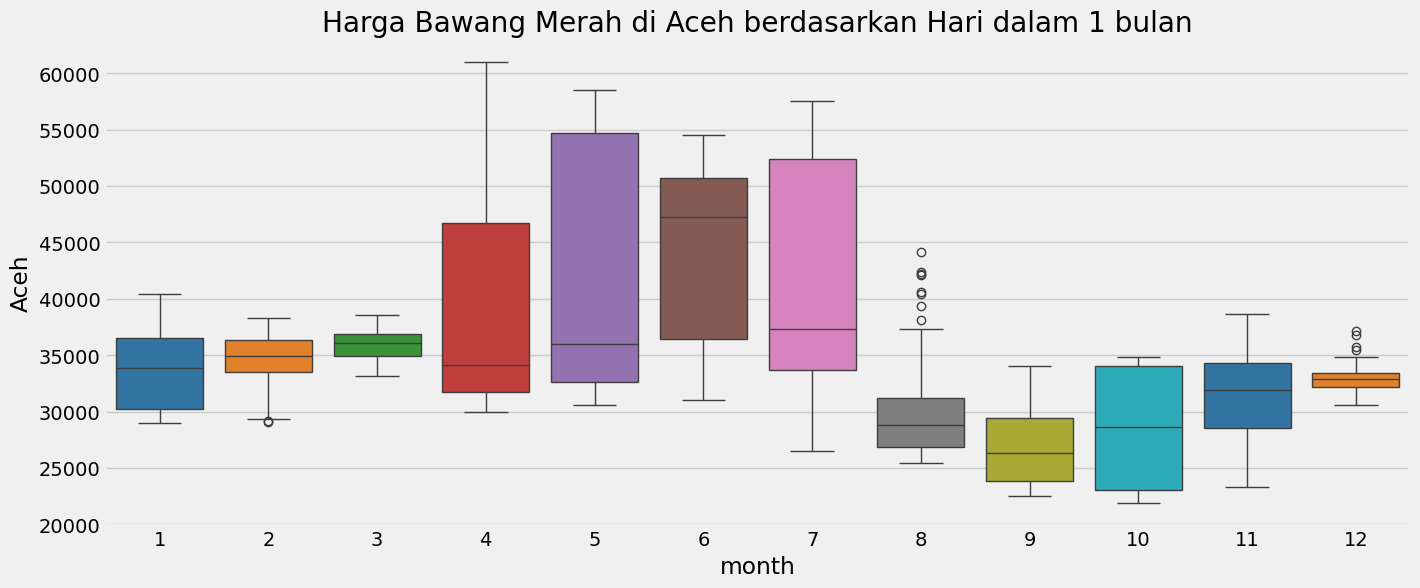

In [91]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_aceh, x='month', y='Aceh', palette=color_pal)
plt.title('Harga Bawang Merah di Aceh berdasarkan Hari dalam 1 bulan')
plt.show()

**Insight**: Sementara dalam hitungan bulan, kita bisa melihat tingkatan-tingkatan yang terjadi, yang membuat grafik dari time series ini berupa **Seasonal**

### 6. Modelling

- 6.1 Data Splitting

In [92]:
train_aceh = df_aceh.loc[df_aceh.index < '2024-01-01']
test_aceh = df_aceh.loc[df_aceh.index >= '2024-01-01']

X_train = train_aceh.drop('Aceh', axis=1)
y_train = train_aceh['Aceh']

X_test = test_aceh.drop('Aceh', axis=1)
y_test = test_aceh['Aceh']

- 6.2 Modelling

- **XGBoost Model Parameter:**
    - n_estimators: Banyaknya pohon yang akan dia buat.
    - early_stopping_rounds: Total epoch yang akan dia hentikan ketika model sudah mulai overfit.
    - learning_rate: kecepatan model belajar `(semakin cepat, maka semakin cepat model belajar namun semakin gampang pula dia lupa dengan pola-pola yang sudah dia pelajari)`

In [ ]:
MODEL_xgb = xgb.XGBRegressor(   n_estimators=1000,
                                early_stopping_rounds=50,
                                learning_rate=0.01,
                                random_state=42)
MODEL_xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:4838.05815	validation_1-rmse:8712.19064
[100]	validation_0-rmse:18.06491	validation_1-rmse:1171.52741
[187]	validation_0-rmse:2.41117	validation_1-rmse:1170.66475


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

- 6.3 Feature Importances: Mengetahui fitur apa yang sebenarnya paling berpengaruh terhadap data.

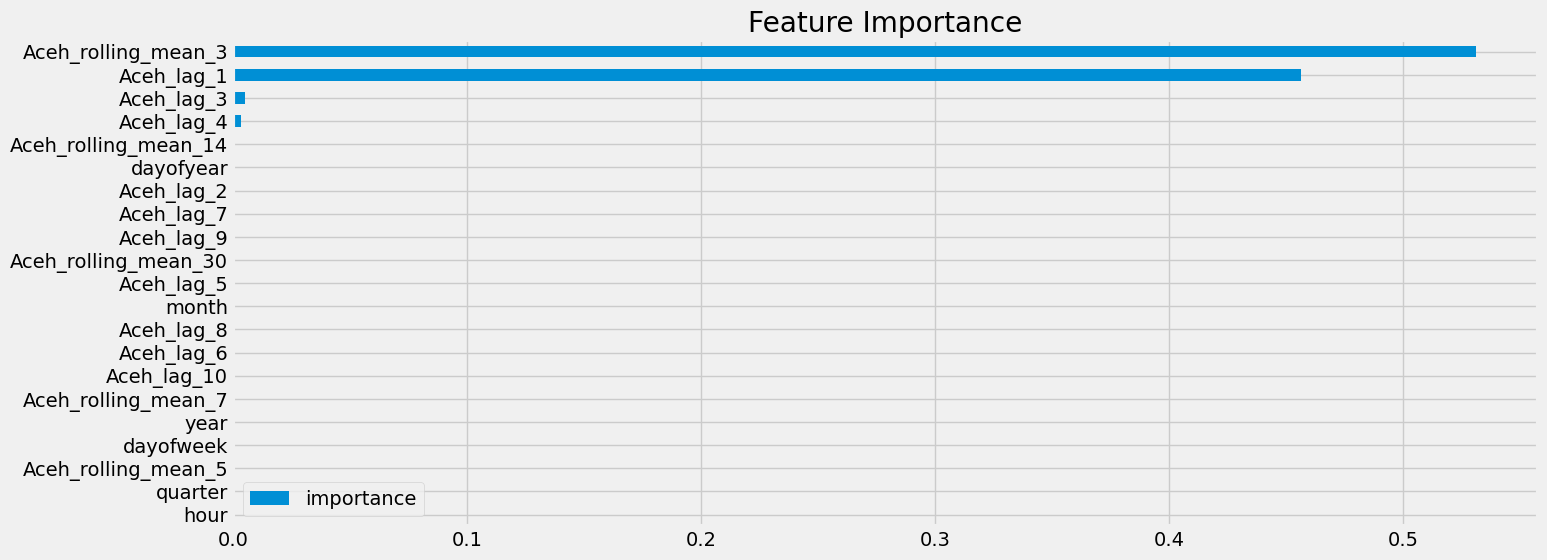

In [94]:
fi = pd.DataFrame(data=MODEL_xgb.feature_importances_,
                  index=MODEL_xgb.feature_names_in_,
                  columns=['importance'])

fi.sort_values('importance').plot(kind='barh', figsize=(15, 6))
plt.title('Feature Importance')
plt.show()

### 7. Evaluation

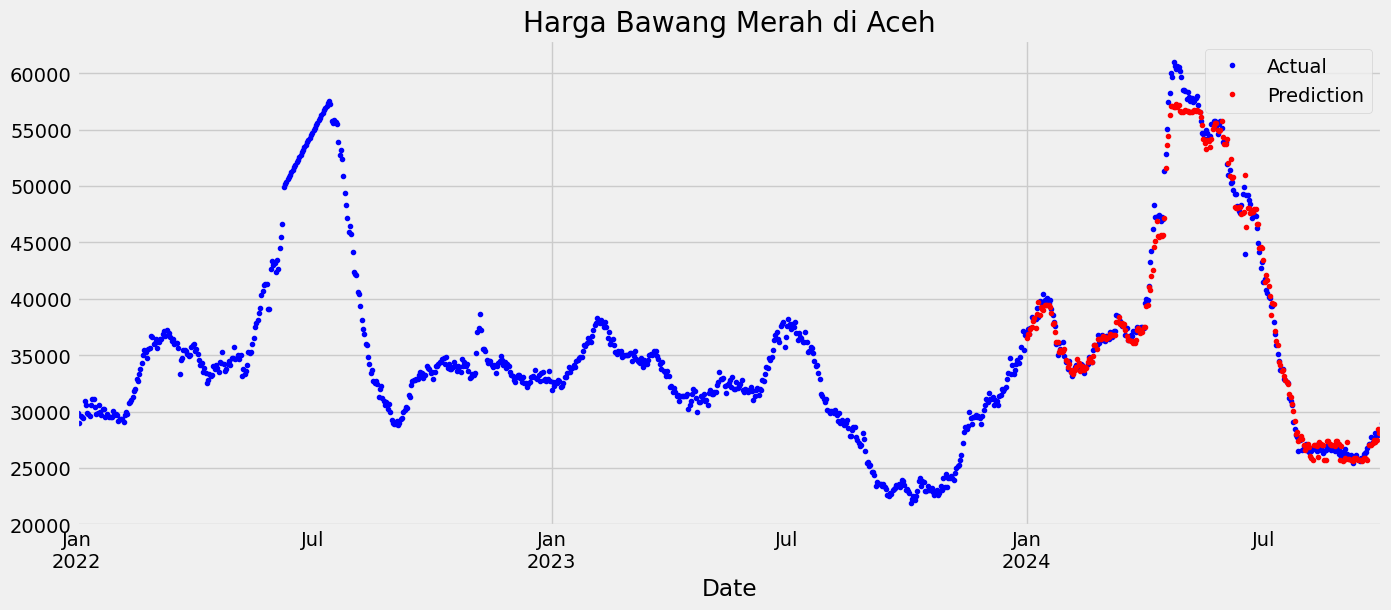

In [95]:
test_aceh['prediction'] = MODEL_xgb.predict(X_test)

df_aceh = df_aceh.merge(test_aceh[['prediction']], how='left', left_index=True, right_index=True)

plt.figure(figsize=(15, 6))
df_aceh['Aceh'].plot(color='blue', lw=2, style='.') # Actual
df_aceh['prediction'].plot(color='red', lw=2, style='.') # Prediction
plt.title('Harga Bawang Merah di Aceh')
plt.legend(['Actual', 'Prediction'])
plt.show()

In [96]:
mape_aceh_score = mape(test_aceh['Aceh'], test_aceh['prediction'])
print(f'MAPE Score: {mape_aceh_score.round(2)}')

MAPE Score: 0.02


---
### 8. Apply for other 34 provinces

In [98]:
def train_predict_evaluate(df, province, cutoff_date='2024-01-01'):
    df = df.copy()
    
    # drop columns that are not needed
    df.drop(columns=df.columns.difference([province]), inplace=True)

    # interpolasi NaN data
    df.interpolate(method='linear', inplace=True)

    # Tambahkan fitur-fitur waktu
    df = create_features(df)

    # handle missing values
    df = handle_missing_values(df)

    # Tambahkan lag features
    df = add_lags(df, province, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

    # Tambahkan rolling mean features
    df = add_rolling_mean(df, province, [3, 5, 7, 14, 30])

    # Split data
    train = df.loc[df.index < cutoff_date]
    test = df.loc[df.index >= cutoff_date]

    # Split features and target
    FEATURES = df.columns.difference([province])
    TARGET = province

    X_train = train[FEATURES]
    y_train = train[TARGET]
    X_test = test[FEATURES]
    y_test = test[TARGET]

    # Model
    model = xgb.XGBRegressor(n_estimators=1000,
                             early_stopping_rounds=50,
                             random_state=42)
    model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose=100)
    
    # Prediction
    test['prediction'] = model.predict(X_test)
    mape_score = mape(test[TARGET], test['prediction'])

    return model, mape_score, test, df

In [99]:
models = {}
mape_scores = {}
training_dataset = {}

provinces = df.columns
for province in provinces:
    print(f"Training model untuk provinsi: {province}")
    
    model, mape_score, test, dataset = train_predict_evaluate(df, province)

    models[province] = model
    mape_scores[province] = mape_score
    training_dataset[province] = dataset

    print(f"MAPE Score: {mape_score.round(2)}")

Training model untuk provinsi: Aceh
[0]	validation_0-rmse:4838.05815	validation_1-rmse:8712.19064
[100]	validation_0-rmse:18.06491	validation_1-rmse:1207.65935
[181]	validation_0-rmse:2.75241	validation_1-rmse:1205.55856
MAPE Score: 0.02
Training model untuk provinsi: Bali
[0]	validation_0-rmse:4691.23429	validation_1-rmse:5648.19993
[64]	validation_0-rmse:43.75773	validation_1-rmse:762.22531
MAPE Score: 0.02
Training model untuk provinsi: Banten
[0]	validation_0-rmse:6197.18692	validation_1-rmse:7264.35461
[61]	validation_0-rmse:68.04411	validation_1-rmse:1050.78287
MAPE Score: 0.02
Training model untuk provinsi: Bengkulu
[0]	validation_0-rmse:5225.25357	validation_1-rmse:7527.57868
[74]	validation_0-rmse:36.66653	validation_1-rmse:854.94957
MAPE Score: 0.01
Training model untuk provinsi: DI Yogyakarta
[0]	validation_0-rmse:5958.03045	validation_1-rmse:7240.05243
[66]	validation_0-rmse:53.14219	validation_1-rmse:996.16793
MAPE Score: 0.02
Training model untuk provinsi: DKI Jakarta
[0]

In [100]:
print("\nMAPE Scores per Provinsi:")
for province, score in mape_scores.items():
    print(f"{province}: {score.round(2)}")

# Rata-rata MAPE Score
mean_mape_score = np.mean(list(mape_scores.values()))
print(f"\nRata-rata MAPE Score: {mean_mape_score.round(2)}")


MAPE Scores per Provinsi:
Aceh: 0.02
Bali: 0.02
Banten: 0.02
Bengkulu: 0.01
DI Yogyakarta: 0.02
DKI Jakarta: 0.02
Gorontalo: 0.02
Jambi: 0.01
Jawa Barat: 0.01
Jawa Tengah: 0.02
Jawa Timur: 0.01
Kalimantan Barat: 0.01
Kalimantan Selatan: 0.01
Kalimantan Tengah: 0.01
Kalimantan Timur: 0.02
Kalimantan Utara: 0.02
Kepulauan Bangka Belitung: 0.02
Kepulauan Riau: 0.01
Lampung: 0.02
Maluku Utara: 0.01
Maluku: 0.02
Nusa Tenggara Barat: 0.02
Nusa Tenggara Timur: 0.01
Papua Barat: 0.01
Papua: 0.01
Riau: 0.02
Sulawesi Barat: 0.02
Sulawesi Selatan: 0.02
Sulawesi Tengah: 0.02
Sulawesi Tenggara: 0.02
Sulawesi Utara: 0.01
Sumatera Barat: 0.02
Sumatera Selatan: 0.02
Sumatera Utara: 0.01

Rata-rata MAPE Score: 0.02


### 9. Submission

> 9.1 **Load Test Set**

In [101]:
df_test = pd.read_csv(f"{path}/test/Bawang Merah.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

df_test.head()

,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> 9.2 Prediksi berdasarkan provinsi menggunakan model yang berbeda-beda

In [102]:
def prepare_test_features(train_df, test_df, target_col):
    """
    Combine train and test datasets, tambahkan lag features dan rolling mean features,
    lalu split kembali menjadi train dan test set,
    kembalikan test set yang sudah siap untuk diprediksi
    """
    # 1. Combine train and test datasets
    df = pd.concat([train_df, test_df])

    # 2. Tambahkan lag features
    df = add_lags(df, target_col, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

    # 3. Tambahkan rolling mean features
    df = add_rolling_mean(df, target_col, [3, 5, 7, 14, 30])

    # 4. Split kembali menjadi train dan test set
    train = df.loc[df.index < test_df.index[0]]
    test = df.loc[df.index >= test_df.index[0]]

    # 5. kembalikan test set yang sudah siap untuk diprediksi
    return test

In [103]:
def predict_test_set(test_set, model_dict, nama_bahan: str):
    # Untuk menyimpan hasil prediksi yang nantinya akan dijadikan submission
    predictions = []

    # Untuk menyimpan provinsi yang ada dalam 1 file csv dari test set
    provinsi_list = test_set.columns

    for province in provinsi_list:
        # Step 1: ambil model yang sudah di-train untuk provinsi tersebut
        model = model_dict[province]

        # Step 2: siapkan test set berupa 'date' dan 'province' tersebut
        test = test_set[[province]].copy()

        # Step 3: Tambahkan fitur-fitur waktu
        test_feat = create_features(test)

        # Step 4: Tambahkan lag features dan rolling mean features
        test_feat = prepare_test_features(train_df=training_dataset[province], test_df=test_feat, target_col=province)

        # Step 5: Split features dan target
        features = test_feat.columns.difference([province])
        X_test = test_feat[features]

        # Step 6: Prediksi harga
        test['prediction'] = model.predict(X_test)

        # Step 7: Simpan hasil prediksi
        for date, pred in zip(test.index, test['prediction']):
            row = f'{nama_bahan}/{province}/{date.date()}'
            predictions.append([row, pred])
    return predictions       

In [104]:
# Bawang Merah
predictions_bawang_merah = predict_test_set(df_test, models, 'Bawang Merah')
output_bawang_merah = pd.DataFrame(predictions_bawang_merah, columns=['id', 'price'])
output_bawang_merah.to_csv('prediksi_bawang_merah.csv', index=False)

> 9.3 Lakukan untuk bahan-bahan lain

In [105]:
def train_model(df):
    models = {}
    mape_scores = {}
    training_dataset = {}
    
    provinces = df.columns
    for province in provinces:
        model, mape_score, test, dataset = train_predict_evaluate(df, province)

        models[province] = model
        mape_scores[province] = mape_score
        training_dataset[province] = dataset
    print("Rata-rata MAPE Score:", np.mean(list(mape_scores.values())))
    return models

In [106]:
# Bawang Putih Bonggol
model_bawang_putih_bonggol = train_model(df_list["Bawang Putih Bonggol"])

# Load test set Bawang Putih Bonggol
df_test = pd.read_csv(f"{path}/test/Bawang Putih Bonggol.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_bawang_putih_bonggol = predict_test_set(df_test, model_bawang_putih_bonggol, 'Bawang Putih Bonggol')
output_bawang_putih_bonggol = pd.DataFrame(predictions_bawang_putih_bonggol, columns=['id', 'price'])
output_bawang_putih_bonggol.to_csv('prediksi_bawang_putih_bonggol.csv', index=False)

[0]	validation_0-rmse:3772.94635	validation_1-rmse:6841.08986


[100]	validation_0-rmse:10.41662	validation_1-rmse:561.16565
[108]	validation_0-rmse:8.51378	validation_1-rmse:561.02890
[0]	validation_0-rmse:4252.31140	validation_1-rmse:6867.69132
[57]	validation_0-rmse:39.16633	validation_1-rmse:947.47092
[0]	validation_0-rmse:3456.27254	validation_1-rmse:7144.24163
[96]	validation_0-rmse:11.98482	validation_1-rmse:1331.45527
[0]	validation_0-rmse:3520.77759	validation_1-rmse:8322.52322
[100]	validation_0-rmse:11.23355	validation_1-rmse:2778.98196
[200]	validation_0-rmse:1.19732	validation_1-rmse:2776.28650
[300]	validation_0-rmse:0.16928	validation_1-rmse:2776.16410
[311]	validation_0-rmse:0.13723	validation_1-rmse:2776.19107
[0]	validation_0-rmse:3712.05860	validation_1-rmse:6797.42082
[63]	validation_0-rmse:30.29295	validation_1-rmse:481.48512
[0]	validation_0-rmse:2734.36638	validation_1-rmse:6368.10492
[76]	validation_0-rmse:14.57555	validation_1-rmse:3347.31493
[0]	validation_0-rmse:3558.67453	validation_1-rmse:7800.62096
[100]	validation_0-r

In [107]:
# Beras Medium
model_beras_medium = train_model(df_list["Beras Medium"])

# Load test set Beras Medium
df_test = pd.read_csv(f"{path}/test/Beras Medium.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_beras_medium = predict_test_set(df_test, model_beras_medium, 'Beras Medium')
output_beras_medium = pd.DataFrame(predictions_beras_medium, columns=['id', 'price'])
output_beras_medium.to_csv('prediksi_beras_medium.csv', index=False)

[0]	validation_0-rmse:553.04938	validation_1-rmse:1296.07886
[73]	validation_0-rmse:2.67512	validation_1-rmse:91.62358
[0]	validation_0-rmse:751.13496	validation_1-rmse:1934.21197
[79]	validation_0-rmse:3.60668	validation_1-rmse:662.79082
[0]	validation_0-rmse:662.63367	validation_1-rmse:1931.88996
[72]	validation_0-rmse:4.40250	validation_1-rmse:961.38854
[0]	validation_0-rmse:702.31824	validation_1-rmse:1959.04841
[96]	validation_0-rmse:2.25451	validation_1-rmse:393.09548
[0]	validation_0-rmse:845.42900	validation_1-rmse:2016.44864
[100]	validation_0-rmse:1.77873	validation_1-rmse:783.77842
[192]	validation_0-rmse:0.31344	validation_1-rmse:783.14176
[0]	validation_0-rmse:565.03050	validation_1-rmse:2507.03951
[100]	validation_0-rmse:1.01935	validation_1-rmse:1243.00052
[193]	validation_0-rmse:0.18847	validation_1-rmse:1242.74509
[0]	validation_0-rmse:776.75836	validation_1-rmse:2326.09886
[80]	validation_0-rmse:3.00477	validation_1-rmse:1217.41836
[0]	validation_0-rmse:491.99474	vali

In [108]:
# Beras Premium
model_beras_premium = train_model(df_list["Beras Premium"])

# Load test set Beras Premium
df_test = pd.read_csv(f"{path}/test/Beras Premium.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_beras_premium = predict_test_set(df_test, model_beras_premium, 'Beras Premium')
output_beras_premium = pd.DataFrame(predictions_beras_premium, columns=['id', 'price'])
output_beras_premium.to_csv('prediksi_beras_premium.csv', index=False)

[0]	validation_0-rmse:619.87515	validation_1-rmse:1437.05539
[76]	validation_0-rmse:2.62670	validation_1-rmse:146.21512
[0]	validation_0-rmse:826.42510	validation_1-rmse:2225.63226
[76]	validation_0-rmse:3.70431	validation_1-rmse:792.17431
[0]	validation_0-rmse:721.44819	validation_1-rmse:2401.68368
[68]	validation_0-rmse:4.03108	validation_1-rmse:935.44547
[0]	validation_0-rmse:818.56184	validation_1-rmse:2187.25229
[72]	validation_0-rmse:3.35674	validation_1-rmse:661.35662
[0]	validation_0-rmse:671.33019	validation_1-rmse:2239.22976
[70]	validation_0-rmse:3.47151	validation_1-rmse:1129.40464
[0]	validation_0-rmse:601.74658	validation_1-rmse:2795.63082
[100]	validation_0-rmse:1.11287	validation_1-rmse:1400.36697
[200]	validation_0-rmse:0.14582	validation_1-rmse:1400.23493
[222]	validation_0-rmse:0.09694	validation_1-rmse:1400.24646
[0]	validation_0-rmse:818.45875	validation_1-rmse:2773.74387
[76]	validation_0-rmse:2.45649	validation_1-rmse:1459.54562
[0]	validation_0-rmse:741.72855	va

In [109]:
# Cabai Merah Keriting
model_cabai_merah_keriting = train_model(df_list["Cabai Merah Keriting"])

# Load test set Cabai Merah Keriting
df_test = pd.read_csv(f"{path}/test/Cabai Merah Keriting.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_cabai_merah_keriting = predict_test_set(df_test, model_cabai_merah_keriting, 'Cabai Merah Keriting')
output_cabai_merah_keriting = pd.DataFrame(predictions_cabai_merah_keriting, columns=['id', 'price'])
output_cabai_merah_keriting.to_csv('prediksi_cabai_merah_keriting.csv', index=False)

[0]	validation_0-rmse:13481.49936	validation_1-rmse:8243.07237
[61]	validation_0-rmse:101.85909	validation_1-rmse:1577.71811
[0]	validation_0-rmse:7448.31949	validation_1-rmse:11676.39241
[84]	validation_0-rmse:36.38699	validation_1-rmse:4260.81309
[0]	validation_0-rmse:13017.33915	validation_1-rmse:9955.69593
[58]	validation_0-rmse:106.52452	validation_1-rmse:2126.49766
[0]	validation_0-rmse:13411.50739	validation_1-rmse:10963.64251
[88]	validation_0-rmse:48.84494	validation_1-rmse:2347.51819
[0]	validation_0-rmse:10513.10621	validation_1-rmse:10984.07835
[100]	validation_0-rmse:35.75183	validation_1-rmse:2548.48430
[156]	validation_0-rmse:9.34567	validation_1-rmse:2548.92588
[0]	validation_0-rmse:12634.95652	validation_1-rmse:10729.58493
[84]	validation_0-rmse:51.51151	validation_1-rmse:2106.98937
[0]	validation_0-rmse:8332.05354	validation_1-rmse:8015.72552
[100]	validation_0-rmse:24.00325	validation_1-rmse:1990.88287
[200]	validation_0-rmse:1.64035	validation_1-rmse:1989.35730
[236

In [110]:
# Cabai Rawit Merah
model_cabai_rawit_merah = train_model(df_list["Cabai Rawit Merah"])

# Load test set Cabai Rawit Merah
df_test = pd.read_csv(f"{path}/test/Cabai Rawit Merah.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_cabai_rawit_merah = predict_test_set(df_test, model_cabai_rawit_merah, 'Cabai Rawit Merah')
output_cabai_rawit_merah = pd.DataFrame(predictions_cabai_rawit_merah, columns=['id', 'price'])
output_cabai_rawit_merah.to_csv('prediksi_cabai_rawit_merah.csv', index=False)

[0]	validation_0-rmse:7526.40020	validation_1-rmse:10408.62340
[100]	validation_0-rmse:23.05001	validation_1-rmse:3751.86782
[101]	validation_0-rmse:22.65976	validation_1-rmse:3751.81736
[0]	validation_0-rmse:12649.91201	validation_1-rmse:10398.85302
[100]	validation_0-rmse:38.56636	validation_1-rmse:1571.05666
[142]	validation_0-rmse:12.97343	validation_1-rmse:1570.75295
[0]	validation_0-rmse:14147.33694	validation_1-rmse:10266.61919
[100]	validation_0-rmse:40.18817	validation_1-rmse:1816.90223
[178]	validation_0-rmse:5.38115	validation_1-rmse:1816.43609
[0]	validation_0-rmse:10817.83229	validation_1-rmse:10180.40677
[100]	validation_0-rmse:43.15660	validation_1-rmse:2206.34673
[168]	validation_0-rmse:8.97806	validation_1-rmse:2205.78523
[0]	validation_0-rmse:12889.80777	validation_1-rmse:10586.20350
[61]	validation_0-rmse:129.31306	validation_1-rmse:1740.77640
[0]	validation_0-rmse:13732.80015	validation_1-rmse:10911.45104
[66]	validation_0-rmse:126.90251	validation_1-rmse:2556.74467

In [111]:
# Daging Ayam Ras
model_daging_ayam_ras = train_model(df_list["Daging Ayam Ras"])

# Load test set Daging Ayam Ras
df_test = pd.read_csv(f"{path}/test/Daging Ayam Ras.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_daging_ayam_ras = predict_test_set(df_test, model_daging_ayam_ras, 'Daging Ayam Ras')
output_daging_ayam_ras = pd.DataFrame(predictions_daging_ayam_ras, columns=['id', 'price'])
output_daging_ayam_ras.to_csv('prediksi_daging_ayam_ras.csv', index=False)

[0]	validation_0-rmse:1105.69609	validation_1-rmse:1150.58581
[100]	validation_0-rmse:3.11505	validation_1-rmse:316.58729
[200]	validation_0-rmse:0.17171	validation_1-rmse:316.39418
[300]	validation_0-rmse:0.01146	validation_1-rmse:316.37752
[335]	validation_0-rmse:0.00928	validation_1-rmse:316.37702
[0]	validation_0-rmse:1426.92089	validation_1-rmse:889.32291
[100]	validation_0-rmse:4.98047	validation_1-rmse:280.89848
[200]	validation_0-rmse:0.22260	validation_1-rmse:280.32482
[300]	validation_0-rmse:0.01143	validation_1-rmse:280.31487
[351]	validation_0-rmse:0.00659	validation_1-rmse:280.31523
[0]	validation_0-rmse:1235.51184	validation_1-rmse:1188.75808
[100]	validation_0-rmse:5.22573	validation_1-rmse:349.17939
[200]	validation_0-rmse:0.29305	validation_1-rmse:348.82992
[300]	validation_0-rmse:0.02159	validation_1-rmse:348.79901
[364]	validation_0-rmse:0.00647	validation_1-rmse:348.79887
[0]	validation_0-rmse:2879.33120	validation_1-rmse:2418.91177
[100]	validation_0-rmse:8.97036	v

In [112]:
# Daging Sapi Murni
model_daging_sapi_murni = train_model(df_list["Daging Sapi Murni"])

# Load test set Daging Sapi Murni
df_test = pd.read_csv(f"{path}/test/Daging Sapi Murni.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_daging_sapi_murni = predict_test_set(df_test, model_daging_sapi_murni, 'Daging Sapi Murni')
output_daging_sapi_murni = pd.DataFrame(predictions_daging_sapi_murni, columns=['id', 'price'])
output_daging_sapi_murni.to_csv('prediksi_daging_sapi_murni.csv', index=False)

[0]	validation_0-rmse:2495.00296	validation_1-rmse:2514.78271
[100]	validation_0-rmse:6.22710	validation_1-rmse:1292.35012
[119]	validation_0-rmse:3.29884	validation_1-rmse:1292.48856
[0]	validation_0-rmse:1639.58816	validation_1-rmse:1110.19074
[100]	validation_0-rmse:5.66071	validation_1-rmse:402.50405
[200]	validation_0-rmse:0.57608	validation_1-rmse:401.81989
[300]	validation_0-rmse:0.11362	validation_1-rmse:401.79411
[358]	validation_0-rmse:0.04029	validation_1-rmse:401.79112
[0]	validation_0-rmse:3293.13925	validation_1-rmse:2813.22737
[100]	validation_0-rmse:9.20369	validation_1-rmse:883.44628
[133]	validation_0-rmse:3.87162	validation_1-rmse:882.71707
[0]	validation_0-rmse:2803.45520	validation_1-rmse:3151.27799
[77]	validation_0-rmse:18.38471	validation_1-rmse:958.90034
[0]	validation_0-rmse:2829.89325	validation_1-rmse:2486.83711
[100]	validation_0-rmse:3.41159	validation_1-rmse:1187.81968
[112]	validation_0-rmse:2.13948	validation_1-rmse:1187.79636
[0]	validation_0-rmse:3921

In [113]:
# Gula Konsumsi
model_gula_konsumsi = train_model(df_list["Gula Konsumsi"])

# Load test set Gula Konsumsi
df_test = pd.read_csv(f"{path}/test/Gula Konsumsi.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_gula_konsumsi = predict_test_set(df_test, model_gula_konsumsi, 'Gula Konsumsi')
output_gula_konsumsi = pd.DataFrame(predictions_gula_konsumsi, columns=['id', 'price'])
output_gula_konsumsi.to_csv('prediksi_gula_konsumsi.csv', index=False)

[0]	validation_0-rmse:599.47869	validation_1-rmse:2487.76411
[100]	validation_0-rmse:1.29901	validation_1-rmse:599.37701
[200]	validation_0-rmse:0.15176	validation_1-rmse:598.62903
[242]	validation_0-rmse:0.06443	validation_1-rmse:598.61431
[0]	validation_0-rmse:506.34772	validation_1-rmse:2683.77033
[100]	validation_0-rmse:1.49110	validation_1-rmse:1204.92920
[200]	validation_0-rmse:0.16635	validation_1-rmse:1204.29631
[255]	validation_0-rmse:0.05857	validation_1-rmse:1204.29060
[0]	validation_0-rmse:522.17593	validation_1-rmse:2572.77439
[100]	validation_0-rmse:1.47663	validation_1-rmse:1442.42145
[200]	validation_0-rmse:0.14271	validation_1-rmse:1441.05146
[284]	validation_0-rmse:0.02729	validation_1-rmse:1441.00833
[0]	validation_0-rmse:497.79482	validation_1-rmse:2499.80100
[73]	validation_0-rmse:3.46263	validation_1-rmse:595.12686
[0]	validation_0-rmse:699.22984	validation_1-rmse:2272.36491
[100]	validation_0-rmse:2.09912	validation_1-rmse:322.84405
[118]	validation_0-rmse:1.3547

In [114]:
# Minyak Goreng Curah
model_minyak_goreng_curah = train_model(df_list["Minyak Goreng Curah"])

# Load test set Minyak Goreng Curah
df_test = pd.read_csv(f"{path}/test/Minyak Goreng Curah.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_minyak_goreng_curah = predict_test_set(df_test, model_minyak_goreng_curah, 'Minyak Goreng Curah')
output_minyak_goreng_curah = pd.DataFrame(predictions_minyak_goreng_curah, columns=['id', 'price'])
output_minyak_goreng_curah.to_csv('prediksi_minyak_goreng_curah.csv', index=False)

[0]	validation_0-rmse:677.86466	validation_1-rmse:816.00103
[100]	validation_0-rmse:1.18381	validation_1-rmse:174.21772
[118]	validation_0-rmse:0.69978	validation_1-rmse:174.37156
[0]	validation_0-rmse:1239.79813	validation_1-rmse:406.81743
[100]	validation_0-rmse:2.24842	validation_1-rmse:167.67465
[200]	validation_0-rmse:0.20495	validation_1-rmse:167.45100
[300]	validation_0-rmse:0.02075	validation_1-rmse:167.44146
[312]	validation_0-rmse:0.01493	validation_1-rmse:167.44019
[0]	validation_0-rmse:996.20349	validation_1-rmse:703.15823
[75]	validation_0-rmse:6.05476	validation_1-rmse:337.24223
[0]	validation_0-rmse:1688.96291	validation_1-rmse:442.32866
[54]	validation_0-rmse:7.03290	validation_1-rmse:479.45347
[0]	validation_0-rmse:948.11120	validation_1-rmse:1013.74587
[100]	validation_0-rmse:2.87693	validation_1-rmse:428.55264
[161]	validation_0-rmse:0.69694	validation_1-rmse:428.60020
[0]	validation_0-rmse:1393.14164	validation_1-rmse:438.87263
[63]	validation_0-rmse:6.69306	validat

In [115]:
# Minyak Goreng Kemasan Sederhana
model_minyak_goreng_kemasan_sederhana = train_model(df_list["Minyak Goreng Kemasan Sederhana"])

# Load test set Minyak Goreng Kemasan Sederhana
df_test = pd.read_csv(f"{path}/test/Minyak Goreng Kemasan Sederhana.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_minyak_goreng_kemasan_sederhana = predict_test_set(df_test, model_minyak_goreng_kemasan_sederhana, 'Minyak Goreng Kemasan Sederhana')
output_minyak_goreng_kemasan_sederhana = pd.DataFrame(predictions_minyak_goreng_kemasan_sederhana, columns=['id', 'price'])
output_minyak_goreng_kemasan_sederhana.to_csv('prediksi_minyak_goreng_kemasan_sederhana.csv', index=False)

[0]	validation_0-rmse:1145.39239	validation_1-rmse:689.04029
[100]	validation_0-rmse:3.80471	validation_1-rmse:120.58005
[148]	validation_0-rmse:1.08886	validation_1-rmse:120.55466
[0]	validation_0-rmse:1688.39795	validation_1-rmse:866.24779
[100]	validation_0-rmse:4.05735	validation_1-rmse:134.63129
[200]	validation_0-rmse:0.46455	validation_1-rmse:134.27429
[300]	validation_0-rmse:0.06356	validation_1-rmse:134.23136
[400]	validation_0-rmse:0.00913	validation_1-rmse:134.22600
[470]	validation_0-rmse:0.00641	validation_1-rmse:134.22556
[0]	validation_0-rmse:1790.07825	validation_1-rmse:574.02997
[62]	validation_0-rmse:13.42412	validation_1-rmse:263.82213
[0]	validation_0-rmse:1926.93138	validation_1-rmse:390.22028
[59]	validation_0-rmse:14.67121	validation_1-rmse:105.99855
[0]	validation_0-rmse:1902.74781	validation_1-rmse:1034.94990
[100]	validation_0-rmse:6.57337	validation_1-rmse:85.18095
[103]	validation_0-rmse:6.05156	validation_1-rmse:85.17161
[0]	validation_0-rmse:1635.14314	val

In [116]:
# Telur Ayam Ras
model_telur_ayam_ras = train_model(df_list["Telur Ayam Ras"])

# Load test set Telur Ayam Ras
df_test = pd.read_csv(f"{path}/test/Telur Ayam Ras.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_telur_ayam_ras = predict_test_set(df_test, model_telur_ayam_ras, 'Telur Ayam Ras')
output_telur_ayam_ras = pd.DataFrame(predictions_telur_ayam_ras, columns=['id', 'price'])
output_telur_ayam_ras.to_csv('prediksi_telur_ayam_ras.csv', index=False)

[0]	validation_0-rmse:1323.99076	validation_1-rmse:1136.32051
[100]	validation_0-rmse:4.17690	validation_1-rmse:162.12688
[168]	validation_0-rmse:0.85051	validation_1-rmse:161.97464
[0]	validation_0-rmse:1609.68959	validation_1-rmse:1440.66790
[100]	validation_0-rmse:6.93617	validation_1-rmse:247.33273
[200]	validation_0-rmse:0.60034	validation_1-rmse:247.15119
[300]	validation_0-rmse:0.05945	validation_1-rmse:247.12704
[361]	validation_0-rmse:0.01546	validation_1-rmse:247.12875
[0]	validation_0-rmse:1837.69144	validation_1-rmse:1411.77498
[87]	validation_0-rmse:8.64394	validation_1-rmse:672.65259
[0]	validation_0-rmse:1434.25562	validation_1-rmse:1000.96093
[100]	validation_0-rmse:3.86435	validation_1-rmse:164.22900
[200]	validation_0-rmse:0.36018	validation_1-rmse:163.94095
[201]	validation_0-rmse:0.34659	validation_1-rmse:163.94036
[0]	validation_0-rmse:1800.92897	validation_1-rmse:1352.61529
[84]	validation_0-rmse:9.12393	validation_1-rmse:199.32540
[0]	validation_0-rmse:1627.69532

In [117]:
# Tepung Terigu (Curah)
model_tepung_terigu_curah = train_model(df_list["Tepung Terigu (Curah)"])

# Load test set Tepung Terigu (Curah)
df_test = pd.read_csv(f"{path}/test/Tepung Terigu (Curah).csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

predictions_tepung_terigu_curah = predict_test_set(df_test, model_tepung_terigu_curah, 'Tepung Terigu (Curah)')
output_tepung_terigu_curah = pd.DataFrame(predictions_tepung_terigu_curah, columns=['id', 'price'])
output_tepung_terigu_curah.to_csv('prediksi_tepung_terigu_curah.csv', index=False)

[0]	validation_0-rmse:536.23835	validation_1-rmse:118.58158
[100]	validation_0-rmse:1.50826	validation_1-rmse:72.50262
[104]	validation_0-rmse:1.45802	validation_1-rmse:72.50233
[0]	validation_0-rmse:583.02307	validation_1-rmse:431.93088
[99]	validation_0-rmse:2.02221	validation_1-rmse:147.90106
[0]	validation_0-rmse:313.71082	validation_1-rmse:135.77989
[100]	validation_0-rmse:0.86818	validation_1-rmse:63.00213
[197]	validation_0-rmse:0.08019	validation_1-rmse:62.93883
[0]	validation_0-rmse:659.96145	validation_1-rmse:178.19467
[100]	validation_0-rmse:2.07091	validation_1-rmse:86.64585
[113]	validation_0-rmse:1.59115	validation_1-rmse:86.76101
[0]	validation_0-rmse:469.46520	validation_1-rmse:624.20810
[59]	validation_0-rmse:4.92737	validation_1-rmse:222.79588
[0]	validation_0-rmse:342.51771	validation_1-rmse:96.33721
[54]	validation_0-rmse:4.16567	validation_1-rmse:79.42554
[0]	validation_0-rmse:791.67591	validation_1-rmse:365.56890
[76]	validation_0-rmse:3.85080	validation_1-rmse:16

In [118]:
# Merge all .csv into one
output = pd.concat([
    output_bawang_merah,
    output_bawang_putih_bonggol,
    output_beras_medium,
    output_beras_premium,
    output_cabai_merah_keriting,
    output_cabai_rawit_merah,
    output_daging_ayam_ras,
    output_daging_sapi_murni,
    output_gula_konsumsi,
    output_minyak_goreng_curah,
    output_minyak_goreng_kemasan_sederhana,
    output_telur_ayam_ras,
    output_tepung_terigu_curah
])

output.head()

,id,price
0,Bawang Merah/Aceh/2024-10-01,24448.322266
1,Bawang Merah/Aceh/2024-10-02,22362.929688
2,Bawang Merah/Aceh/2024-10-03,22509.025391
3,Bawang Merah/Aceh/2024-10-04,22466.626953
4,Bawang Merah/Aceh/2024-10-05,22647.386719


In [119]:
output.to_csv('submission.csv', index=False)